In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_datareader as data
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor



In [55]:
df=pd.read_csv("/content/google.csv")

In [56]:
df.tail()

,Date,Open,High,Low,Close,Volume
2627,2025-06-13 00:00:00-04:00,172.440002,177.130005,172.389999,174.669998,27663100
2628,2025-06-16 00:00:00-04:00,174.729996,176.940002,174.649994,176.770004,27389200
2629,2025-06-17 00:00:00-04:00,175.699997,177.360001,174.580002,175.949997,24973000
2630,2025-06-18 00:00:00-04:00,176.009995,176.559998,173.199997,173.320007,28707500
2631,2025-06-20 00:00:00-04:00,173.949997,174.339996,165.460007,166.639999,75247800


In [57]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


In [58]:
df.describe()

,Open,High,Low,Close,Volume
count,2632.000000,2632.000000,2632.000000,2632.000000,2.632000e+03
mean,86.171830,87.109553,85.267370,86.203260,3.520367e+07
std,46.474509,47.027338,45.954676,46.482478,1.694592e+07
min,24.813187,24.864877,24.399170,24.704838,9.312000e+06
25%,47.866059,48.168117,47.530320,47.950429,2.479400e+07
50%,68.554110,69.491240,67.326218,68.825230,3.093600e+07
75%,126.968145,128.498469,125.457837,126.611784,4.010725e+07
max,202.910386,206.561759,202.331752,205.893341,2.571620e+08


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2632 non-null   object 
 1   Open    2632 non-null   float64
 2   High    2632 non-null   float64
 3   Low     2632 non-null   float64
 4   Close   2632 non-null   float64
 5   Volume  2632 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 123.5+ KB


In [60]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [61]:
df.shape

(2632, 6)

In [62]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [63]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)
df.set_index('Date', inplace=True)



df.index = pd.to_datetime(df.index)

yearly_first = df.resample('Y').first()

/tmp/ipython-input-63-4046224350.py:8: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



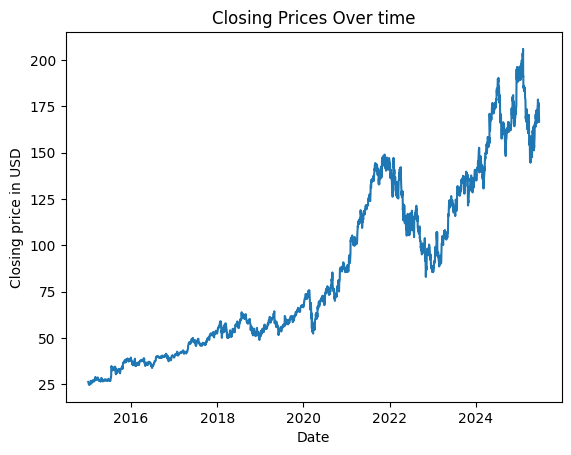

In [64]:
plt.plot(df['Close'])
plt.title('Closing Prices Over time')
plt.xlabel('Date')
plt.ylabel('Closing price in USD')
plt.show()

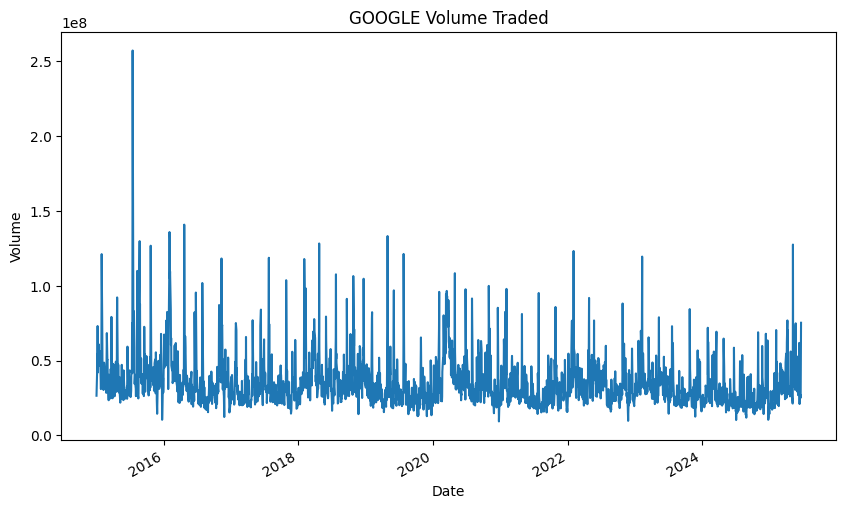

In [65]:
plt.figure(figsize=(10,6))
df['Volume'].plot(title='GOOGLE Volume Traded')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

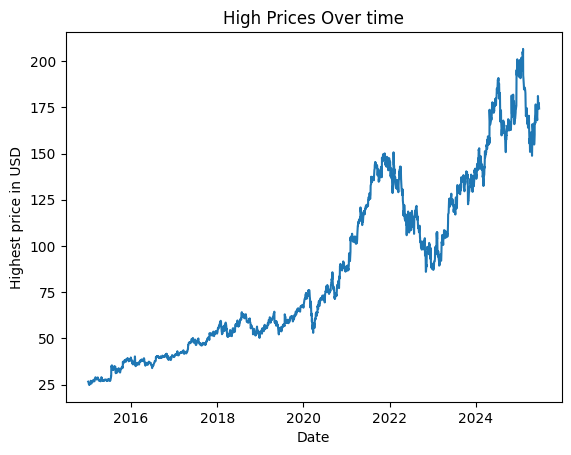

In [66]:
plt.plot(df['High'])
plt.title('High Prices Over time')
plt.xlabel('Date')
plt.ylabel('Highest price in USD')
plt.show()

<Figure size 1000x800 with 0 Axes>

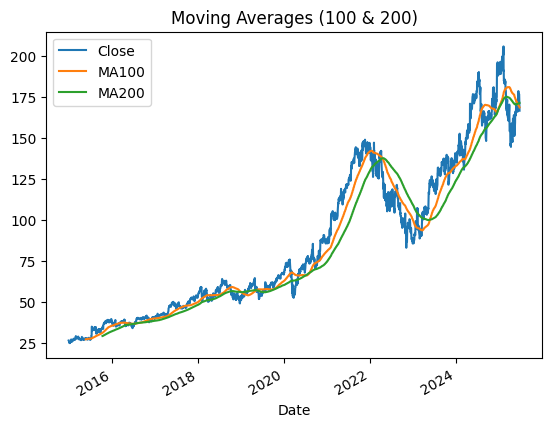

In [67]:
plt.figure(figsize=(10,8))
df['MA100'] = df['Close'].rolling(window=100).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
df[['Close', 'MA100', 'MA200']].plot(title='Moving Averages (100 & 200)')
plt.show()

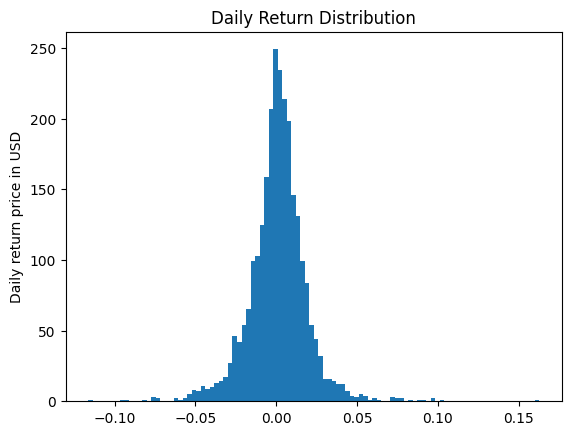

In [68]:
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].plot(kind='hist', bins=100, title='Daily Return Distribution')
plt.ylabel('Daily return price in USD')
plt.show()



In [69]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MA100', 'MA200',
       'Daily Return'],
      dtype='object')


In [70]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Candlestick(x=df.index,
                                  open=df['Open'],
                                  high=df['High'],
                                  low=df['Low'],
                                  close=df['Close'])])
fig.update_layout(title='Google Stock Price Analysis from 2014-2025',
                 xaxis_rangeslider_visible=True)
fig.show()


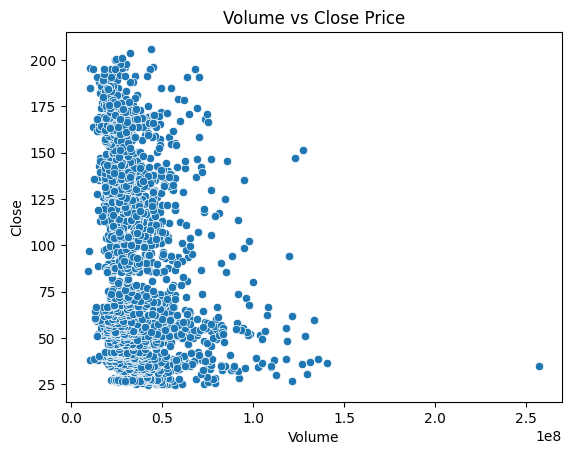

In [71]:
sns.scatterplot(x=df['Volume'], y=df['Close'])
plt.title('Volume vs Close Price')
plt.show()


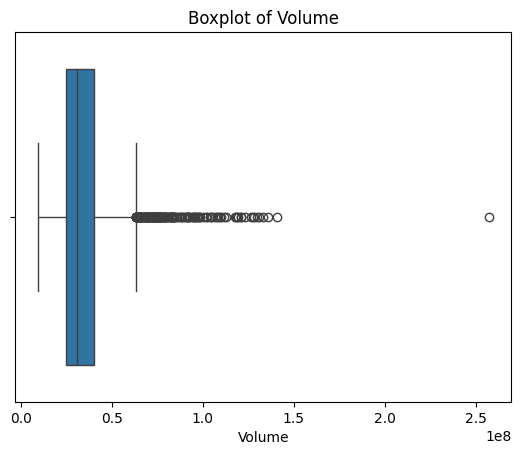

In [72]:
sns.boxplot(x=df['Volume'].dropna())
plt.title('Boxplot of Volume')
plt.show()


In [73]:
data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df) * 0.70):])


In [74]:
scaler=MinMaxScaler(feature_range=(0,1))
data_tscaled=scaler.fit_transform(data_train)

In [75]:
x_train=[]
y_train=[]
if not isinstance(data_tscaled, np.ndarray):
    data_tscaled = np.array(data_tscaled)

for i in range(100,data_tscaled.shape[0]):
  x_train.append(data_tscaled[i-100:i])
  y_train.append(data_tscaled[i,0])

x_train , y_train =np.array(x_train), np.array(y_train)

In [76]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_split, y_test_split = train_test_split(
    x_train_flat, y_train, test_size=0.2, random_state=42)

In [77]:
model = XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=6,random_state=42)
model.fit(X_train, y_train_split)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [78]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test_split, y_pred)
mae = mean_absolute_error(y_test_split, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


MSE: 0.00
MAE: 0.01


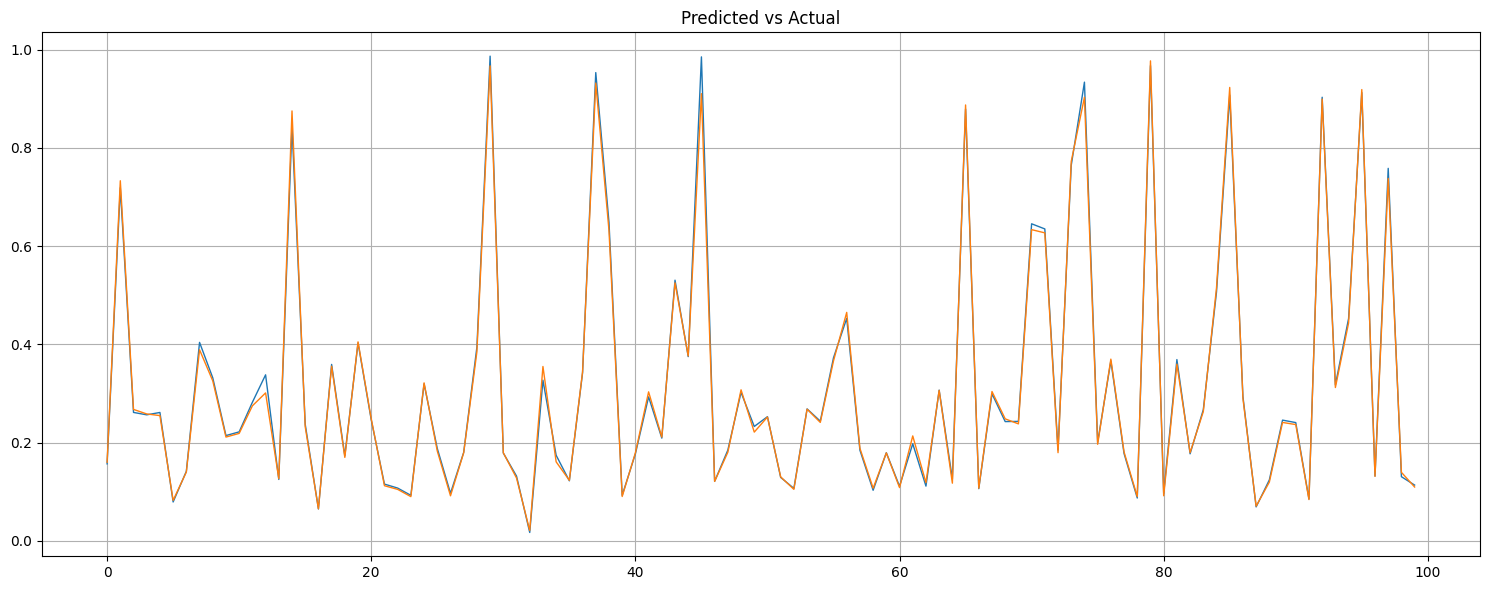

In [79]:
plt.figure(figsize=(15, 6))
plt.plot(y_test_split[:100], label='Actual', linewidth=1)
plt.plot(y_pred[:100], label='Predicted', linewidth=1)
plt.title("Predicted vs Actual")
plt.grid()
plt.tight_layout()
plt.show()


In [80]:
def predict_future_prices(model, df, scaler, days_to_predict=1):
    last_100_days = df['Close'][-100:].values.reshape(-1, 1)
    last_100_scaled = scaler.transform(pd.DataFrame(last_100_days, columns=['Close']))

    predictions = []

    for _ in range(days_to_predict):
        X_input = last_100_scaled.reshape(1, -1)
        pred_scaled = model.predict(X_input)[0]

        # Inverse scale
        pred_price = scaler.inverse_transform([[pred_scaled]])[0][0]
        predictions.append(pred_price)

        # Append prediction to sequence and roll
        last_100_scaled = np.append(last_100_scaled, [[pred_scaled]], axis=0)
        last_100_scaled = last_100_scaled[1:]  # keep only latest 100

    return predictions
F=int(input("Enter the no of days you want to predict the stock price "))
future_days = F
predicted_prices = predict_future_prices(model, df, scaler, days_to_predict=future_days)

for i, price in enumerate(predicted_prices, 1):
    print(f"Day {i}: ${price:.2f}")



Enter the no of days you want to predict the stock price 5
Day 1: $140.94
Day 2: $137.97
Day 3: $134.25
Day 4: $131.39
Day 5: $128.89


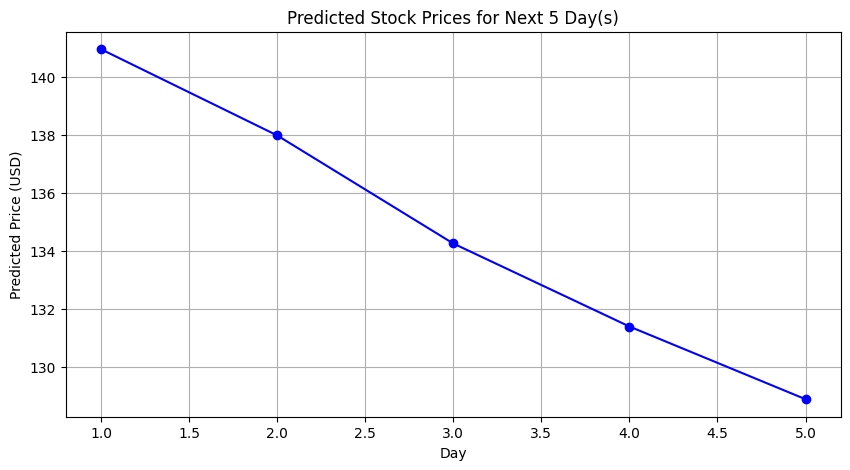

In [81]:

days = list(range(1, future_days + 1))

plt.figure(figsize=(10, 5))
plt.plot(days, predicted_prices, marker='o', linestyle='-', color='blue')
plt.title(f"Predicted Stock Prices for Next {future_days} Day(s)")
plt.xlabel("Day")
plt.ylabel("Predicted Price (USD)")
plt.grid(True)
plt.show()


In [82]:
import joblib
joblib.dump(model, 'stock.joblib')
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']